# Assignment 1

In [ ]:
# first, install the necessary packages in the terminal using the following commands
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib
# pip install pandas

In [22]:
import os
import sys
sys.path.append("../..")
# openCV
import cv2
# numpy
import numpy as np
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
# plotting
import matplotlib.pyplot as plt
# pandas for making dataframes
import pandas as pd

/tmp/ipykernel_19503/643772579.py:14: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [34]:
#creating a filepath to the specific image we are working with. the .jpg can be replaced with another from the same directory
filepath = os.path.join("..", "..", "..", "..", "cds-vis-data", "flowers", "image_1243.jpg")

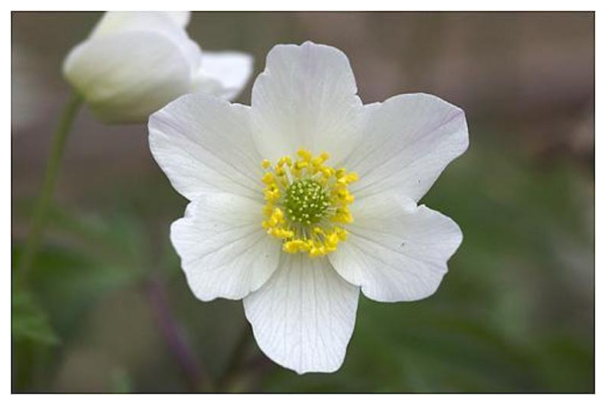

In [35]:
image_flower = cv2.imread(filepath)
show(image_flower)

In [15]:
# create a histogram for the chosen flower imge
hist_flower = cv2.calcHist([image_flower], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
normalized_hist_flower = cv2.normalize(hist_flower, hist_flower, 0, 1.0, cv2.NORM_MINMAX)

In [24]:
# loop to make normalized histograms for every file
datapath_data = os.path.join("..", "..", "..", "..", "cds-vis-data", "flowers")
filelist_data = sorted(os.listdir(datapath_data))
# make empty list for distance scores to be added to
distance_scores = []

for files in filelist_data:
    filepath_data = datapath_data + "/" + files
    image_data = cv2.imread(filepath_data)
    hist_data = cv2.calcHist([image_data], [0,1,2], None, [255,255,255], [0,256, 0,256, 0,256])
    normalized_hist_data = cv2.normalize(hist_data, hist_data, 0, 1.0, cv2.NORM_MINMAX)
    distance = round(cv2.compareHist(normalized_hist_flower, normalized_hist_data, cv2.HISTCMP_CHISQR), 2)

    # create list for every file
    file_info = [files, distance]
    # append the file's info to the collected list for the whole folder's info
    distance_scores.append(file_info)

# creating a dataframe with pandas using folder_info
df = pd.DataFrame(distance_scores,
                    columns=["Filename", "Distance"])

# sort the dataframe by shortest distance, and show the first 5 results apart from the flower we selected in the beginning
df = df.sort_values(by=['Distance'])[1:6]

# upload dataframe to output folder
outpath = os.path.join("..", "output", "flowercomparison.csv")
df.to_csv(outpath)

In [31]:
# show dataframe
df

,Filename,Distance
604,image_0605.jpg,115.41
140,image_0141.jpg,137.69
138,image_0139.jpg,139.87
141,image_0142.jpg,147.66
716,image_0717.jpg,149.67


Define a particular image that you want to work with
For that image:
Extract the colour histogram using OpenCV
Extract colour histograms for all of the *other images in the data
Compare the histogram of our chosen image to all of the other histograms
For this, use the cv2.compareHist() function with the cv2.HISTCMP_CHISQR metric
Find the five images which are most simlar to the target image (print filename and distance score in a pandas df)
Save a CSV file to the folder called out, showing the five most similar images and the distance metric